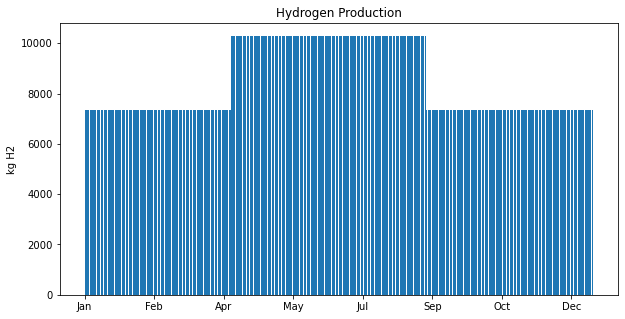

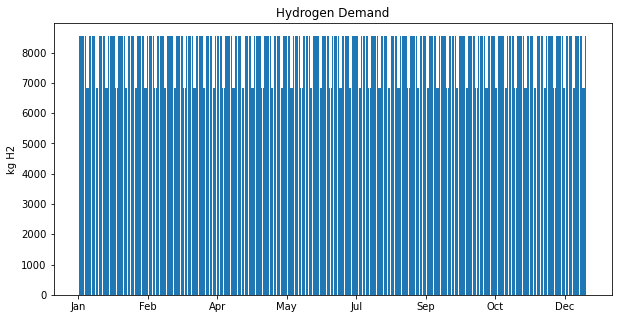

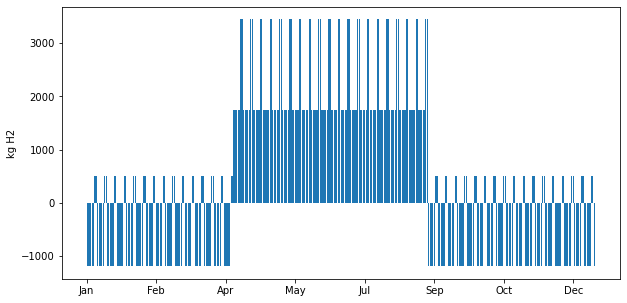

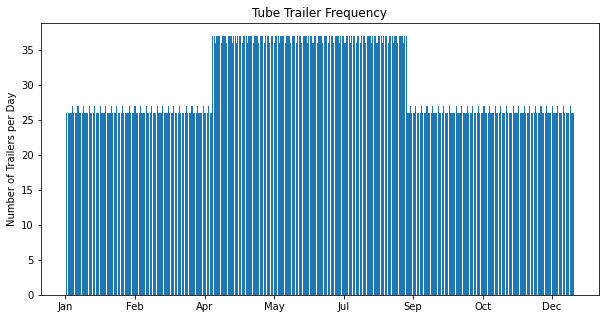

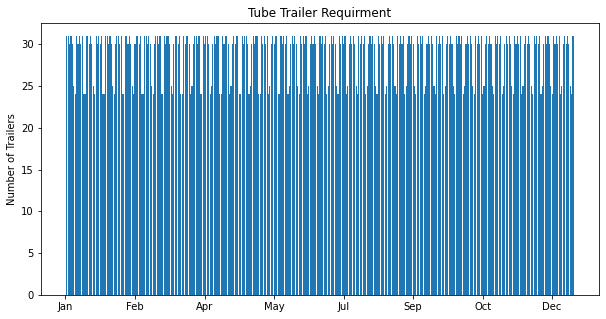

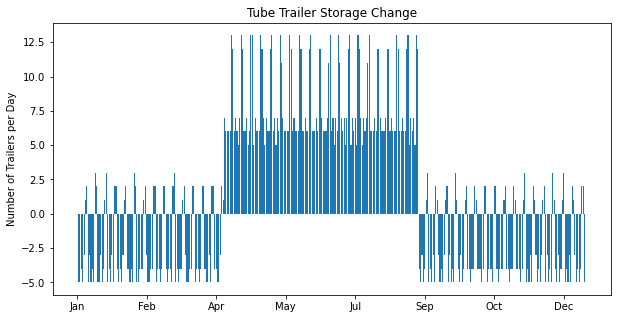

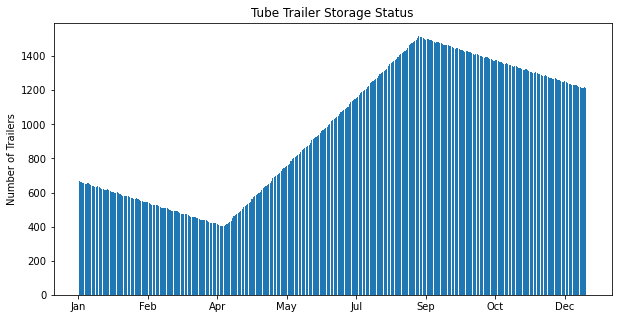

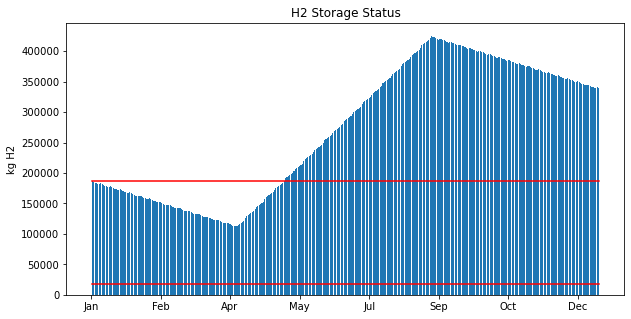

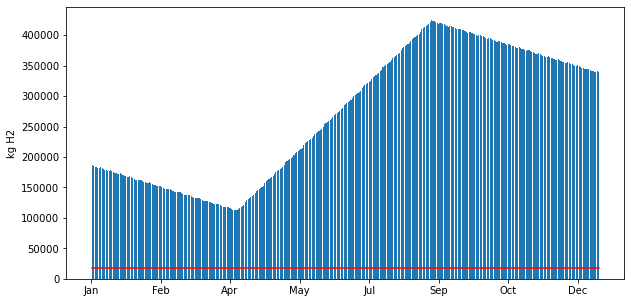

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib.dates as mdates

# import output from Lingxi's model
df = pd.read_csv("file:///C:/Users/Sasha/Documents/3rd%20Year/3YP%20Green%20Hydrogen/optimised-daily-hydrogen-v2.csv")
df1 = df["Output"]
df_ = pd.read_csv("file:///C:/Users/Sasha/Documents/3rd%20Year/3YP%20Green%20Hydrogen/daily_hydrogen_output.csv")
df2 = df_["Req"]

df3 = df1-df2

#class for tube trailer
class trailer:
    def __init__(self,capacity,pressure):
        self.capacity = capacity #kg
        self.pressure = pressure #bar
        
trailer1 = trailer(300,228) 
trailer2 = trailer(600,228)
trailer3 = trailer(900,300)
trailer4 = trailer(280,180) #standard in UK

#select trailer and extract relevant values
tubeTrailer = trailer4
trailerCapacity = tubeTrailer.capacity
trailerPressure = tubeTrailer.pressure

#initialise
currMassBal = 0
trailerCount = 0
nTrailers = 0
trailerSet = []
reqSet = []
massReq = 0
reqCount = 0

i = 0

while i < len(df1):
    currMassBal = currMassBal + df1[i]
    dailyTrailer = 0
    nTrailers = 0
    #get number of needed trailers given current mass of H2
    nTrailers = math.floor((currMassBal/trailerCapacity))
    dailyTrailer = dailyTrailer + nTrailers
    currMassBal = currMassBal - trailerCapacity*nTrailers
    trailerCount = trailerCount + nTrailers
    trailerSet.append(dailyTrailer)
    
    massReq = massReq + df2[i]
    dayReqTrail = 0
    nReq = 0
    #number of req
    nReq = math.ceil((massReq/trailerCapacity))
    dayReqTrail = dayReqTrail + nReq
    massReq = massReq - trailerCapacity*nReq
    reqCount = reqCount + nReq
    reqSet.append(dayReqTrail)
    
    i = i + 1
    
    

dailyTrailerReq = (1/280)*df2
dTR = []
i = 0

while i < len(dailyTrailerReq):
    #dTR1 = 0+dailyTrailerReq[i]
    dTR1 = 0 + reqSet[i]
    
    dTR.append(dTR1)
    
    i = i + 1
    
suppMinDemand = []
    
i = 0
while i < len(trailerSet):
    
    suppMinDemand1 = trailerSet[i] - dTR[i]
    
    suppMinDemand.append(suppMinDemand1)
    
    i = i + 1
    
storeTot = []
currStoreTot = 672.2707

i = 0
while i < len(suppMinDemand):
    currStoreTot = currStoreTot + suppMinDemand[i]
    
    storeTot.append(currStoreTot)
    
    i = i + 1
    
### kg section so can plot hydrogen and ammonia on same graph
storeTot_kg = []
compHy = []
exUnder = []
storekg = 0
exU = 0

i = 0
while i< len(storeTot):
    storekg = 280*storeTot[i]
    comp1 = 17100
    exU = 186967.596
    
    storeTot_kg.append(storekg)
    compHy.append(comp1)
    exUnder.append(exU)
    
    i = i + 1


#print(trailerCount)
#print(currMassBal)
#print(trailerCapacity)
#print(sum(df1))
#print(sum(df2))
#print(280*sum(reqSet))
#print(storeTot[364])
#print(min(storeTot))
#print(min(storeTot_kg))
#print(max(storeTot_kg))
#print(len(storeTot_kg))
#print(storeTot_kg[0])
#print(storeTot_kg[364])



daysNum = len(df1)
daySet = np.arange(1,daysNum + 1)

plt.figure(figsize = (10,5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.bar(daySet,df1)

plt.title("Hydrogen Production")
plt.ylabel("kg H2")
plt.show()

plt.figure(figsize = (10,5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.bar(daySet,df2)

plt.title("Hydrogen Demand")
plt.ylabel("kg H2")
plt.show()

plt.figure(figsize = (10,5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.bar(daySet,df3)

#plt.title("Difference Between Production and Demand")
plt.ylabel("kg H2")
plt.show()

plt.figure(figsize = (10,5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.bar(daySet,trailerSet)

plt.title("Tube Trailer Frequency")
plt.ylabel("Number of Trailers per Day")
plt.show()


plt.figure(figsize = (10,5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.bar(daySet,dTR)

plt.title("Tube Trailer Requirment")
plt.ylabel("Number of Trailers")
plt.show()

plt.figure(figsize = (10,5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.bar(daySet,suppMinDemand)



plt.title("Tube Trailer Storage Change")
plt.ylabel("Number of Trailers per Day")
plt.show()




plt.figure(figsize = (10,5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.bar(daySet,storeTot)


plt.title("Tube Trailer Storage Status")
plt.ylabel("Number of Trailers")
plt.show()

plt.figure(figsize = (10,5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.bar(daySet,storeTot_kg)
plt.plot(daySet, compHy, 'red')
plt.plot(daySet, exUnder, 'red')


plt.title("H2 Storage Status")
plt.ylabel("kg H2")
plt.show()

plt.figure(figsize = (10,5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.bar(daySet,storeTot_kg)
plt.plot(daySet, compHy, 'red')
#plt.plot(daySet, exUnder, 'red')


#plt.title("H2 Storage Status")
plt.ylabel("kg H2")
plt.show()
